# Project 3
## Thomas Clark
### Fall2021, CPSC483-01
***
In this project you will use scikit-learn, which is a higher-level machine learning library that works with NumPy data, and Pandas, a library that makes it easier to manipulate data. You will explore a variety of classification algorithms, and compare their performance on a “real-world” dataset, which will introduce its own set of challenges.
***
### 1. Download bank-additional.zip and extract its contents. Use pandas.read_csv() to load and examine the dataset from bank-additional-full.csv, and pandas.DataFrame.head() to examine its contents.
***

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

RSTATE = (2021-10-25)

banknames = pd.read_csv('bank-additional-full.csv', delimiter = ';')
banknames.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


***
### 2. Use sklearn.model_selection.train_test_split() to split the features and target values into separate training and test sets. Since the dataset is large, use 90% of the original data as a training set, and 10% for testing. To make sure that your results are reproducible, pass the keyword argument random_state=(2021-10-25).
***

In [255]:
from sklearn.model_selection import train_test_split

training, testing = train_test_split(banknames, test_size = .1, random_state = RSTATE)

print(len(training), "Items in training set")
print(len(testing), " Items in testing set")
print((len(testing)+len(training)), "Items total")

37069 Items in training set
4119  Items in testing set
41188 Items total


***
### 3. Your training and test sets will need some significant preprocessing before they can be used: <br><br> a) Per the description in bank-additional-names.txt, the duration “should be discarded if the intention is to have a realistic predictive model.” <br><br> b) The feature y is the target response; set this aside for use in training and testing, then drop it from your features.
***

In [256]:
yTrain = training.get('y').replace('no', 0).replace('yes',1)
yTest = testing.get('y').replace('no', 0).replace('yes',1)

training.drop(columns = ['duration', 'y'], inplace = True)
testing.drop(columns = ['duration', 'y'], inplace = True)

training.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
22975,56,retired,married,professional.course,no,yes,no,cellular,aug,mon,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
14746,26,technician,single,professional.course,no,unknown,unknown,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1
12505,38,admin.,divorced,high.school,no,yes,no,cellular,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1
6801,33,admin.,divorced,university.degree,no,no,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
18389,29,admin.,married,high.school,no,no,no,cellular,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1


***
### 4. First, let’s see if we can determine whether a client will subscribe to a term deposit based on what we know about them. Let’s take as input features the variables described as “bank client data” in bank-additional-names.txt.
***

In [257]:
def catEncode(dataSet):

    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('job'), prefix = 'job', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('marital'), prefix = 'marital', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('education'), prefix = 'education', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('default'), prefix = 'default', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('housing'), prefix = 'housing', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('loan'), prefix = 'loan', drop_first = True)], axis = 1, sort = False, join = 'inner')
    #dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('contact'), prefix = 'contact', drop_first = True)], axis = 1, sort = False, join = 'inner')
    #dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('month'), prefix = 'month', drop_first = True)], axis = 1, sort = False, join = 'inner')
    #dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('day_of_week'), prefix = 'day_of_week', drop_first = True)], axis = 1, sort = False, join = 'inner')
    #dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('poutcome'), prefix = 'poutcome', drop_first = True)], axis = 1, sort = False, join = 'inner')
        
    dataSet.drop(columns = ['job', 'marital', 'education', 'default', 'housing', 'loan'], inplace = True)
    dataSet.drop(columns = ['contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome'], inplace = True) #Discard other/extra attributes
    
    return dataSet
    
trainingSE = catEncode(training) #Set aside the social/economic factors for later
testingSE = catEncode(testing)

training = trainingSE.copy()
testing = testingSE.copy()
training.drop(columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], inplace = True)
testing.drop(columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], inplace = True)

trainingSE.drop(columns = ['age', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes'])

testingSE.drop(columns = ['age', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes'])

print()

***
### 5. Use scikit-learn to fit a Categorical Naive Bayes classifier to the training set, then score it on both the training and test sets. How accurate is the classifier?
***

In [258]:
from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB()

cnb.fit(training, yTrain)

print("Training Score: ", cnb.score(training, yTrain))
print("Test Score: ", cnb.score(testing, yTest))

Training Score:  0.8818689470986538
Test Score:  0.8788540907987376


We see that the Categorical Naive Bayes classifier is returning ~86% accuracy on both the training and test sets.
***
### 6. Take another look at the data you used for the previous experiment. Most of the data is categorical, but age is a quantitative predictor. Categorical Naive Bayes assumes that each value of the age variable is a separate category. How many categories are there? Is this reasonable?
***

In [259]:
print(banknames['age'].nunique(), "different catagories for age")

78 different catagories for age


This is not reasonable as the difference in one year may have different outcomes that affect the classifier more than they would if this data was aggregated into larger chunks.
***
### 7. Try splitting ages into bins, one per decade. Verify the number of bins, then re-train your classifier the bins instead of the original age value. Does its performance change?
***

In [260]:
training2 = training
testing2 = testing

training2['age'] = training2['age'].floordiv(10) #divide by 10 and chop off the decimal - sorted by decade
testing2['age'] = testing2['age'].floordiv(10)

print((banknames['age'].floordiv(10)).nunique(), "different catagories for age\n")

cnb.fit(training2, yTrain)

print("Training Score: ", cnb.score(training2, yTrain))
print("Test Score: ", cnb.score(testing2, yTest))

9 different catagories for age

Training Score:  0.8812484825595511
Test Score:  0.8786113134255887


While the classifiers performance did slightly change, it was not in any significant amount. Decade age of the individual has similar weight to just the age of the individual.
***
### 8. Repeat experiment (5) (i.e. with the original age values) with a KNN classifier. How do the results compare?
***

In [261]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(training, yTrain)

print("Training Score: ", knn.score(training, yTrain))
print("Test Score: ", knn.score(testing, yTest))

Training Score:  0.8857266179287275
Test Score:  0.876911871813547


These results are only marginally better than what was achieved with the categorical naiave Bayes classifier, though in testing we achive almost the same result as the Bayes classifier.
***
### 9. How many values in the test set have response 0, and how many have response 1? What would be the score if we simply assumed that no customer ever subscribed to the product?
***

In [262]:
counts = (yTrain.value_counts() + yTest.value_counts())

print(counts)

print("\nPercent of non subscribers: ", counts[0]/counts.sum())

0    36548
1     4640
Name: y, dtype: int64

Percent of non subscribers:  0.8873458288821987


If we were just to blindly predict no for each test we would actually test better than our classifiers and even outpreform the training for the Bayes classifiers.
***
### 10. Use numpy.zeros_like() to create a target vector representing the output of the “dumb” classifier described in the previous experiment, then create a confusion matrix and find its AUC.
***

[[TN,FP],[FN,TP]]
 [[36548     0]
 [ 4640     0]]
ROC Area under curve:  0.5


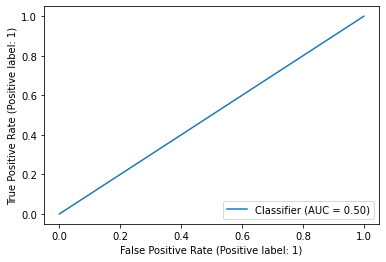

In [263]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

fullSet = pd.concat([training2, testing2])
fullTarget = pd.concat([yTrain, yTest])
dumbTarget = np.zeros_like(fullTarget)

print("[[TN,FP],[FN,TP]]\n",
confusion_matrix(fullTarget, dumbTarget))
print("ROC Area under curve: ", roc_auc_score(fullTarget, dumbTarget))
RocCurveDisplay.from_predictions(fullTarget, dumbTarget)

***
### 11. Create confusion matrices and compute the AUC for each of the classifiers in experiments (7) and (8). How well are these classifiers actually performing?
***

Categorical Naive Bayes:
[[TN,FP],[FN,TP]]
 [[35358  1190]
 [ 4476   164]]
ROC Area under curve:  0.5013924531933442


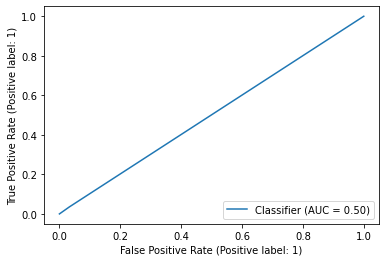


Nearest Neighbor:
[[TN,FP],[FN,TP]]
 [[35895   653]
 [ 4554    86]]
ROC Area under curve:  0.500333784008182


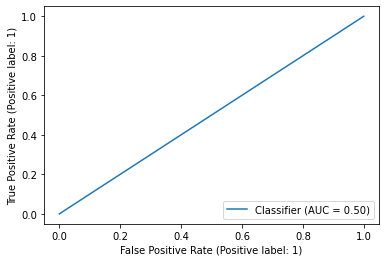

In [264]:
cnbScore = cnb.predict(pd.concat([testing, training]))
knnScore = knn.predict(pd.concat([testing, training]))

print("Categorical Naive Bayes:")
print("[[TN,FP],[FN,TP]]\n", confusion_matrix(fullTarget, cnbScore))
print("ROC Area under curve: ", roc_auc_score(fullTarget, cnbScore))
RocCurveDisplay.from_predictions(fullTarget, cnbScore)
plt.show()

print("\nNearest Neighbor:")
print("[[TN,FP],[FN,TP]]\n", confusion_matrix(fullTarget, knnScore))
print("ROC Area under curve: ", roc_auc_score(fullTarget, knnScore))
RocCurveDisplay.from_predictions(fullTarget, knnScore)

It appears from the results that these classifiers are randomly guessing with a AUC of .5
***
### 12. It should be clear from your results that we are dealing with imbalanced data. One of the easiest ways to deal with an unbalanced dataset is random oversampling.
***

In [265]:
balancedSet = fullSet.sample(frac = 1, replace = True, weights = fullTarget.replace(1,10).replace(0,1) , random_state = RSTATE)
balancedTarget = fullTarget.sample(frac = 1, replace = True, weights = fullTarget.replace(1,10).replace(0,1) , random_state = RSTATE)

balancedTraining, balancedTesting = train_test_split(balancedSet, test_size = .1, random_state = RSTATE)
balancedTargetTraining, balancedTargetTesting = train_test_split(balancedTarget, test_size = .1, random_state = RSTATE)

print("Oversampled set:")
balancedTarget.value_counts()

Oversampled set:


1    23120
0    18068
Name: y, dtype: int64

***
### 13. Retrain both classifiers on balanced training sets, and find the score, confusion matrix, and AUC for each. Which classifier performs better?
***

Categorical Naive Bayes:
Training Score:  0.6140710566780868
Test Score:  0.604758436513717
[[TN,FP],[FN,TP]]
 [[ 8659  9409]
 [ 6525 16595]]
ROC Area under curve:  0.5985109453866324


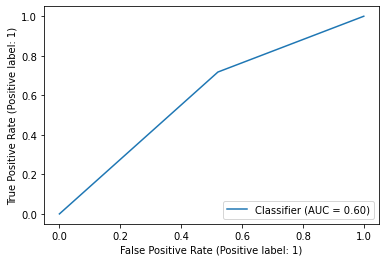


Nearest Neighbor:
Training Score:  0.6192236100245488
Test Score:  0.5933478999757222
[[TN,FP],[FN,TP]]
 [[13929  4139]
 [11651 11469]]
ROC Area under curve:  0.633492489541624


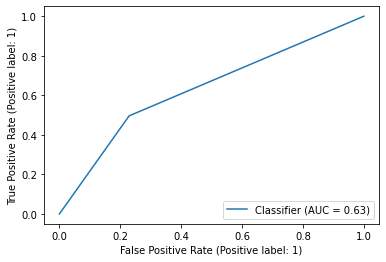

In [266]:
cnb.fit(balancedTraining, balancedTargetTraining)
knn.fit(balancedTraining, balancedTargetTraining)

cnbScore = cnb.predict(balancedSet)
knnScore = knn.predict(balancedSet)

print("Categorical Naive Bayes:")
print("Training Score: ", cnb.score(balancedTraining, balancedTargetTraining))
print("Test Score: ", cnb.score(balancedTesting, balancedTargetTesting))
print("[[TN,FP],[FN,TP]]\n", confusion_matrix(balancedTarget, cnbScore))
print("ROC Area under curve: ", roc_auc_score(balancedTarget, cnbScore))
RocCurveDisplay.from_predictions(balancedTarget, cnbScore)
plt.show()

print("\nNearest Neighbor:")
print("Training Score: ", knn.score(balancedTraining, balancedTargetTraining))
print("Test Score: ", knn.score(balancedTesting, balancedTargetTesting))
print("[[TN,FP],[FN,TP]]\n", confusion_matrix(balancedTarget, knnScore))
print("ROC Area under curve: ", roc_auc_score(balancedTarget, knnScore))
RocCurveDisplay.from_predictions(balancedTarget, knnScore)

We can now that the nearest neighbor classifier is preforming slightly better than the naive Bayes classifier, the ROC_AUC score is now closer to 1 for the nearest neighbor.
***
### 14. So far, we have been using data about our clients to predict subscriptions. But perhaps their decisions are influenced more by the overall health of the economy than by their individual circumstances.
### Let’s try the input variables described as “social and economic context attributes” in bank-additional-names.txt. These features are quantitative, so you can use Gaussian Naive Bayes. Based on the score, confusion matrix, and AUC, how well does this data predict the response?
***

Gaussian Naive Bayes:
Training Score:  0.787801127626858
Test Score:  0.7766448167030833
[[TN,FP],[FN,TP]]
 [[27798  8750]
 [ 3528  1112]]
ROC Area under curve:  0.5001219935616081


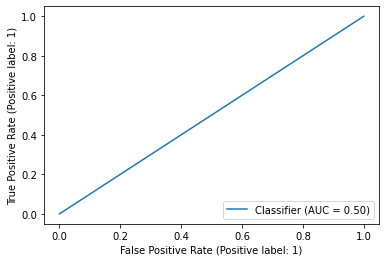


Nearest Neighbor:
Training Score:  0.9215247241630473
Test Score:  0.8812818645302258
[[TN,FP],[FN,TP]]
 [[35285  1263]
 [ 4463   177]]
ROC Area under curve:  0.5017946286036691


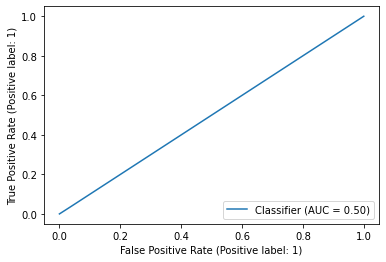

In [267]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(trainingSE, yTrain)
knn.fit(trainingSE, yTrain)
gnbScore = gnb.predict(pd.concat([testingSE, trainingSE]))
knnScore = knn.predict(pd.concat([testingSE, trainingSE]))

print("Gaussian Naive Bayes:")
print("Training Score: ", gnb.score(trainingSE, yTrain))
print("Test Score: ", gnb.score(testingSE, yTest))
print("[[TN,FP],[FN,TP]]\n", confusion_matrix(fullTarget, gnbScore))
print("ROC Area under curve: ", roc_auc_score(fullTarget, gnbScore))
RocCurveDisplay.from_predictions(fullTarget, gnbScore)
plt.show()

print("\nNearest Neighbor:")
print("Training Score: ", knn.score(trainingSE, yTrain))
print("Test Score: ", knn.score(testingSE, yTest))
print("[[TN,FP],[FN,TP]]\n", confusion_matrix(fullTarget, knnScore))
print("ROC Area under curve: ", roc_auc_score(fullTarget, knnScore))
RocCurveDisplay.from_predictions(balancedTarget, knnScore)

With the social and economic data added in the gaussian naive Bayes classifier does not preform better than the categorical naive Bayes classifier.
***
### 15. Do the results of the last experiment change if the training set is balanced?
***

Gaussian Naive Bayes:
Training Score:  0.7109444549353907
Test Score:  0.708667152221413
[[TN,FP],[FN,TP]]
 [[13311  4757]
 [ 7158 15962]]
ROC Area under curve:  0.7135573856702822


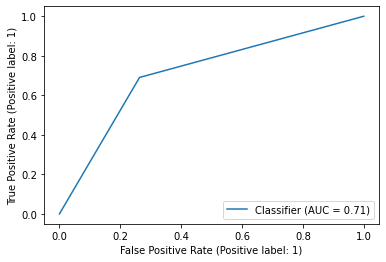


Nearest Neighbor:
Training Score:  0.9693544471121422
Test Score:  0.9077445982034474
[[TN,FP],[FN,TP]]
 [[17583   485]
 [ 1031 22089]]
ROC Area under curve:  0.9642817684901253


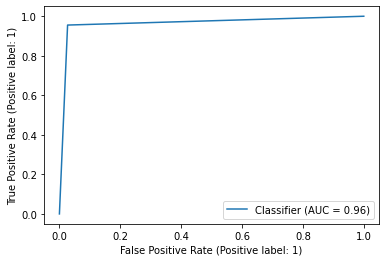

In [269]:
fullSetSE = pd.concat([trainingSE, testingSE])
balancedSetSE = fullSetSE.sample(frac = 1, replace = True, weights = fullTarget.replace(1,10).replace(0,1) , random_state = RSTATE)

balancedTrainingSE, balancedTestingSE = train_test_split(balancedSetSE, test_size = .1, random_state = RSTATE)

gnb.fit(balancedTrainingSE, balancedTargetTraining)
knn.fit(balancedTrainingSE, balancedTargetTraining)
gnbScore = gnb.predict(balancedSetSE)
knnScore = knn.predict(balancedSetSE)

print("Gaussian Naive Bayes:")
print("Training Score: ", gnb.score(balancedTrainingSE, balancedTargetTraining))
print("Test Score: ", gnb.score(balancedTestingSE, balancedTargetTesting))
print("[[TN,FP],[FN,TP]]\n", confusion_matrix(balancedTarget, gnbScore))
print("ROC Area under curve: ", roc_auc_score(balancedTarget, gnbScore))
RocCurveDisplay.from_predictions(balancedTarget, gnbScore)
plt.show()

print("\nNearest Neighbor:")
print("Training Score: ", knn.score(balancedTrainingSE, balancedTargetTraining))
print("Test Score: ", knn.score(balancedTestingSE, balancedTargetTesting))
print("[[TN,FP],[FN,TP]]\n", confusion_matrix(balancedTarget, knnScore))
print("ROC Area under curve: ", roc_auc_score(balancedTarget, knnScore))
RocCurveDisplay.from_predictions(balancedTarget, knnScore)
plt.show()

Yes, balancing the data through oversampling increased the preformance of both of the classifiers.